# Exploratory Data Analysis (Haberman's Survival)

## **What's the problem?**
* We are asked to predict the **patient's survival** from breast cancer after 5 years of surgery.
* Patient's details like **age, year of treatment and number of cancer nodes** are facilitated to us.

## **Importing libs and loading data**

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from fractions import Fraction
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Ments/4. Haberman Dataset/haberman.csv")

## **Overview of dataset**

In [5]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
data.shape

(306, 4)

In [7]:
data['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

In [8]:
## Imbalanced dataset ratio (source: https://www.w3resource.com/python-exercises/math/python-math-exercise-82.php?passed=passed)
flt_ratio = data['status'].value_counts()[1]/data['status'].value_counts()[2]
print(f"class1:class0 ratio -> {Fraction(flt_ratio).limit_denominator()}")

class1 = data['status'].value_counts()[1]/data.shape[0] 
class2 = data['status'].value_counts()[2]/data.shape[0]

print(f"Percetage of datapoints for class1: {class1*100}\nPercetage of datapoints for class2: {class2*100}\n")

class1:class0 ratio -> 25/9
Percetage of datapoints for class1: 73.52941176470588
Percetage of datapoints for class2: 26.47058823529412



In [9]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

**Key points**
* There are total of `306` datapoints, and each datapoint has `3 features` and `1 response variable`
* Features are `age, year, nodes`
* Response variable is `status`
* `status` has only `two` values, (maps to `binary clasification` problem)
* class1 has `255`, class2 has `81` datapoints. So, given dataset is imbalanced with the imbalance ratio `25:9` OR 
* Dataset has `~73%` of points from class1 and `~26%` of points from class2

## **Analysing the dataset using plots**

### Univariate analysis

In [ ]:
## source: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/
data['status'] = data['status'].astype('str')

data_class_1 = data.loc[data['status']=='1']
data_class_2 = data.loc[data['status']=='2']

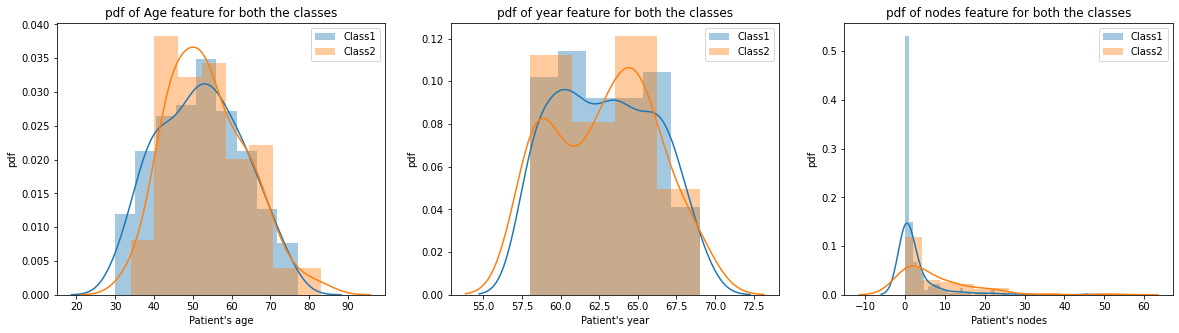

In [ ]:
######################## Probability Density function ########################
plt.figure(1, figsize=(20,5))
#### Age
plt.subplot(1,3,1)
plt.title("pdf of Age feature for both the classes")
sns.distplot(data_class_1['age'], hist=True, label='Class1')
sns.distplot(data_class_2['age'], hist=True, label='Class2')
plt.xlabel("Patient's age")
plt.ylabel("pdf")
plt.legend()

#### Year
plt.subplot(1,3,2)
plt.title("pdf of year feature for both the classes")
sns.distplot(data_class_1['year'], hist=True, label='Class1')
sns.distplot(data_class_2['year'], hist=True, label='Class2')
plt.xlabel("Patient's year")
plt.ylabel("pdf")
plt.legend()

#### Nodes
plt.subplot(1,3,3)
plt.title("pdf of nodes feature for both the classes")
sns.distplot(data_class_1['nodes'], hist=True, label='Class1')
sns.distplot(data_class_2['nodes'], hist=True, label='Class2')
plt.xlabel("Patient's nodes")
plt.ylabel("pdf")
plt.legend()

plt.show()

* All three features's pdfs are overlap. i.e to say that two classes of datapoints have same distribution
* It is barely possible to classify the given datapoint to either of the classes with only these three features.
* But from the last plot (No. of nodes plot), There is a high chance to declare that patient can survie from the cancer if the patient has 'Zero' cancer nodes present.
* And also there is a less chance of survival if the number of cancer nodes are above 20  

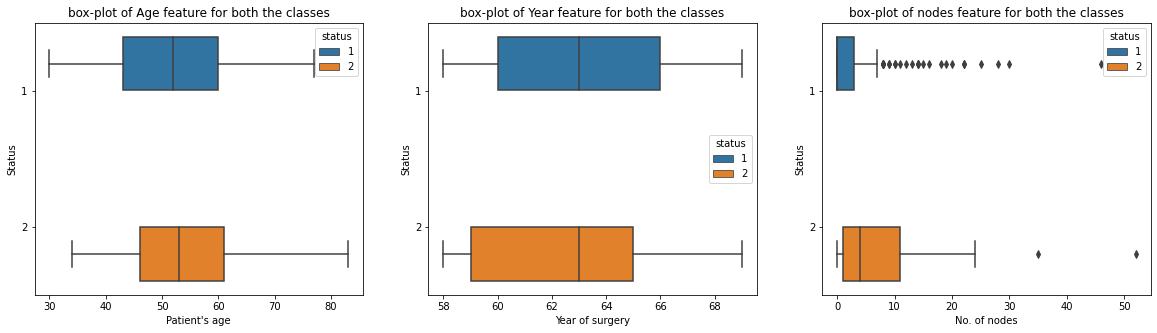

In [ ]:
######################## Box plot ########################

plt.figure(1, figsize=(20,5))
#### Age
plt.subplot(1,3,1)
plt.title("box-plot of Age feature for both the classes")
sns.boxplot(data=data, x='age', y='status', hue='status')
plt.xlabel("Patient's age")
plt.ylabel("Status")

#### Year
plt.subplot(1,3,2)
plt.title("box-plot of Year feature for both the classes")
sns.boxplot(data=data, x='year', y='status', hue='status')
plt.xlabel("Year of surgery")
plt.ylabel("Status")

#### Nodes
plt.subplot(1,3,3)
plt.title("box-plot of nodes feature for both the classes")
sns.boxplot(data=data, x='nodes', y='status', hue='status')
plt.xlabel("No. of nodes")
plt.ylabel("Status")

plt.show()

* Age and Year donot seem to have a imortant part in the classfying the datapoints. 
* No. of nodes has a more number of outliers for the classs1, that means even if the nodes increase for few patients have survived from cancer.
* As the number of nodes increases the chance of survival is very less.

### Bivariate analysis

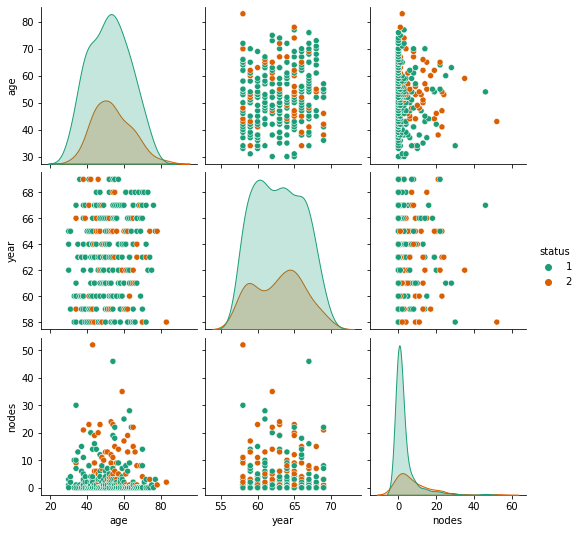

In [11]:
sns.pairplot(data=data, hue='status', palette='Dark2')
plt.show()

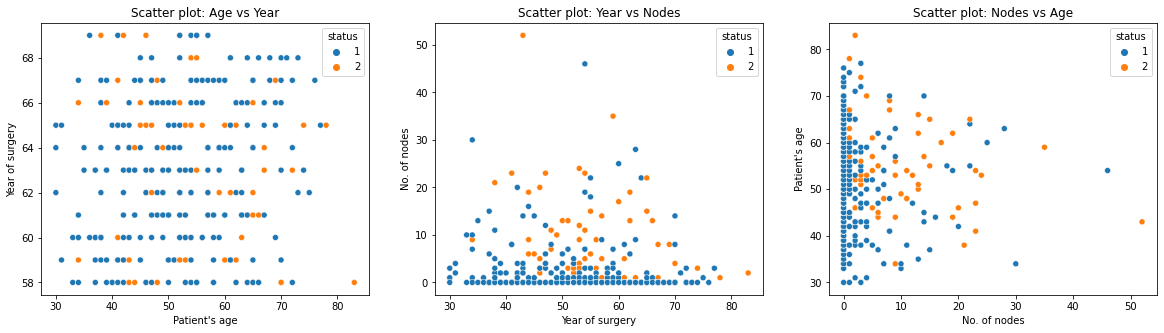

In [ ]:
######################## All pair-wise Scatter plot ########################

plt.figure(1, figsize=(20,5))
#### Age vs Year
plt.subplot(1,3,1)
plt.title("Scatter plot: Age vs Year")
sns.scatterplot(data=data, x=data['age'], y=data['year'], hue=data['status'])
plt.xlabel("Patient's age")
plt.ylabel("Year of surgery")

#### Year and Nodes
plt.subplot(1,3,2)
plt.title("Scatter plot: Year vs Nodes")
sns.scatterplot(data=data, x=data['age'], y=data['nodes'], hue=data['status'])
plt.xlabel("Year of surgery")
plt.ylabel("No. of nodes")

#### Nodes and Age
plt.subplot(1,3,3)
plt.title("Scatter plot: Nodes vs Age")
sns.scatterplot(data=data, x=data['nodes'], y=data['age'], hue=data['status'])
plt.xlabel("No. of nodes")
plt.ylabel("Patient's age")

plt.show()

* All possible pairs of three features have a huge overlapping amoung the classes.
* It becomes difficult to classify the points based on these features.

In [ ]:
data.corr()

,age,year,nodes
age,1.000000,0.089529,-0.063176
year,0.089529,1.000000,-0.003764
nodes,-0.063176,-0.003764,1.000000


* `nodes` has a better correlation to the response variable `status`
* `age` and `year` donot contibute much in deciding the `status` of a patient

## **Conclusion**

* Dataset has a class imbalance, `76% of class1` and `26% of class2` datapoints.
* `age` and `year` of operation donot have a significance in deciding whether the patient survived or not.
* No. of cancer `nodes` has a better say in the predicting the survival status of patient.
* It is a non-linear type of dataset, so using linear models like logistic regression will not yield us the best possible accuracy.
* We might have to find the better features for this problem to be solved with the higher accuracy.